In [1]:
import numpy as np 
import pandas as pd 

from skimage import io 
from skimage.transform import resize
from skimage.color import rgb2gray

from sklearn import svm
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import os

In [9]:
x = []
y = []

path = '/train'
filepaths = [os.path.join(r,file) for r,d,f in os.walk(os.getcwd() + path) for file in f]
filepaths = [x for x in filepaths if x.endswith(".PNG")]

for filename in filepaths:
    im = io.imread(filename)
    im = np.round((resize(im, (36, 36), anti_aliasing=True, preserve_range=True))).astype(int)

    if im.shape[2] == 4:
         im = np.delete(im, 3, 2)

    if filename.split("_")[1].split(".")[0] == '1':
         x.append(im)
         y.append(1)

    elif filename.split("_")[1].split(".")[0] == '2':
         x.append(im)
         y.append(2)

    elif filename.split("_")[1].split(".")[0] == '3':
         x.append(im)
         y.append(3)


X_train = np.array(x)
labels = np.array(y)
len(X_train)

37

In [10]:
# X_train = np.delete(X_train, 3, 3)
# plt.imshow(X_train[0]) 

IndexError: index 3 is out of bounds for axis 3 with size 3

In [11]:
x = np.copy(X_train)
# x[0].shape

In [12]:
pixel_values = []

for i in x:
    pixel_values.append(np.float32(i)/255)

x = np.array(pixel_values)

In [13]:
np.insert(x[0].reshape(-1, 3), 3, 1, axis=1)

#x[0].reshape(-1, 3).shape

array([[0.6627451 , 0.5294118 , 0.42352942, 1.        ],
       [0.6392157 , 0.5372549 , 0.41960785, 1.        ],
       [0.6156863 , 0.53333336, 0.41568628, 1.        ],
       ...,
       [0.8509804 , 0.58431375, 0.41568628, 1.        ],
       [0.85882354, 0.5882353 , 0.41568628, 1.        ],
       [0.8627451 , 0.5921569 , 0.41568628, 1.        ]], dtype=float32)

In [14]:
data = pd.DataFrame(columns = ["r", "g", "b", "class"])

In [15]:
for i in range(len(labels)):
    data = data.append(pd.DataFrame(np.insert(x[i].reshape(-1, 3), 3, labels[i], axis=1), columns = ["r", "g", "b", "class"]))

In [16]:
data

,r,g,b,class
0,0.662745,0.529412,0.423529,1.0
1,0.639216,0.537255,0.419608,1.0
2,0.615686,0.533333,0.415686,1.0
3,0.643137,0.525490,0.415686,1.0
4,0.682353,0.509804,0.415686,1.0
...,...,...,...,...
1291,0.831373,0.639216,0.643137,3.0
1292,0.835294,0.639216,0.643137,3.0
1293,0.831373,0.635294,0.647059,3.0
1294,0.827451,0.627451,0.654902,3.0


In [17]:
data = data.reset_index()
data = data.drop(["index"], axis=1)
data

,r,g,b,class
0,0.662745,0.529412,0.423529,1.0
1,0.639216,0.537255,0.419608,1.0
2,0.615686,0.533333,0.415686,1.0
3,0.643137,0.525490,0.415686,1.0
4,0.682353,0.509804,0.415686,1.0
...,...,...,...,...
47947,0.831373,0.639216,0.643137,3.0
47948,0.835294,0.639216,0.643137,3.0
47949,0.831373,0.635294,0.647059,3.0
47950,0.827451,0.627451,0.654902,3.0


In [18]:
x = data.iloc[:, [0, 1, 2]].values
x

array([[0.6627451 , 0.5294118 , 0.42352942],
       [0.6392157 , 0.5372549 , 0.41960785],
       [0.6156863 , 0.53333336, 0.41568628],
       ...,
       [0.83137256, 0.63529414, 0.64705884],
       [0.827451  , 0.627451  , 0.654902  ],
       [0.8235294 , 0.62352943, 0.6509804 ]], dtype=float32)

In [19]:
y = data['class'].values
y

array([1., 1., 1., ..., 3., 3., 3.], dtype=float32)

In [20]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

In [21]:
x

array([[0.6627451 , 0.5294118 , 0.42352942],
       [0.6392157 , 0.5372549 , 0.41960785],
       [0.6156863 , 0.53333336, 0.41568628],
       ...,
       [0.83137256, 0.63529414, 0.64705884],
       [0.827451  , 0.627451  , 0.654902  ],
       [0.8235294 , 0.62352943, 0.6509804 ]], dtype=float32)

In [22]:
# parameter_candidates = [
#   {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#   {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
# ]

# # Create a classifier with the parameter candidates
# clf = GridSearchCV(estimator = svm.SVC(), param_grid = parameter_candidates, n_jobs = -1)

# # Print out the results 
# print('Best score for training data:', clf.best_score_)
# print('Best `C`:',clf.best_estimator_.C)
# print('Best kernel:',clf.best_estimator_.kernel)
# print('Best `gamma`:',clf.best_estimator_.gamma)

clf = svm.SVC(C=100, kernel='linear', gamma='scale')

# Train the classifier on training data
clf.fit(x, y) 



SVC(C=100, kernel='linear')

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

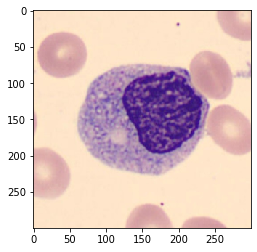

In [37]:
X_test = io.imread("dataset/Dataset 2/003.bmp")
l, w = X_test.shape[0:2]

pixel_values = []

pixel_values = np.float32(X_test)/255

X_test = np.array(pixel_values)

plt.imshow(X_test)

In [38]:
l, w

(300, 300)

In [39]:
test = pd.DataFrame(columns = ["r", "g", "b"])
test = test.append(pd.DataFrame(X_test.reshape(-1, 3), columns = ["r", "g", "b"]))
test

,r,g,b
0,0.992157,0.890196,0.784314
1,0.992157,0.890196,0.784314
2,0.992157,0.890196,0.784314
3,0.992157,0.890196,0.784314
4,0.992157,0.890196,0.784314
...,...,...,...
89995,1.000000,0.901961,0.784314
89996,1.000000,0.894118,0.776471
89997,1.000000,0.890196,0.772549
89998,0.992157,0.886275,0.756863


In [40]:
X_test = test.iloc[:, :].values
X_test

array([[0.99215686, 0.8901961 , 0.78431374],
       [0.99215686, 0.8901961 , 0.78431374],
       [0.99215686, 0.8901961 , 0.78431374],
       ...,
       [1.        , 0.8901961 , 0.77254903],
       [0.99215686, 0.8862745 , 0.75686276],
       [1.        , 0.8862745 , 0.76862746]], dtype=float32)

In [41]:
y_pred = clf.predict(X_test)

In [42]:
cluster1_mean = np.mean(X_test[y_pred == 1], axis=0)
cluster2_mean = np.mean(X_test[y_pred == 2], axis=0)
cluster3_mean = np.mean(X_test[y_pred == 3], axis=0)

In [43]:
y_pred.reshape(-1, 1)

array([[3.],
       [3.],
       [3.],
       ...,
       [3.],
       [3.],
       [3.]], dtype=float32)

In [44]:
y_mean = []
for i in y_pred:
    if i == 1:
        y_mean.append(cluster1_mean)

    elif i == 2:
        y_mean.append(cluster2_mean)

    elif i == 3:
        y_mean.append(cluster3_mean)
y_mean = np.array(y_mean)

In [45]:
np.unique(y_pred, return_counts=True)

(array([1., 2., 3.], dtype=float32), array([26126,  9008, 54866], dtype=int64))

In [46]:
y_mean.shape

(90000, 3)

In [47]:
y_mean = y_mean.reshape(l, w, 3)

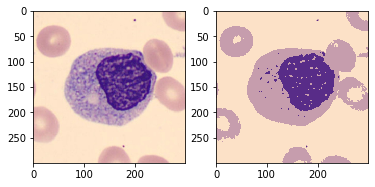

In [48]:
plt.subplot(1, 2, 1)
plt.imshow(io.imread("dataset/Dataset 2/003.bmp"))

plt.subplot(1, 2, 2)
plt.imshow(y_mean)
plt.show()

In [30]:
import pickle

In [31]:
with open('clf.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [32]:
with open('clf.pickle', 'rb') as f:     
    hezn = pickle.load(f)